In [1]:
# Import Libraries
import os
import cv2
import math
import glob
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Steps for Creating Panoramas

1. Find keypoints in all images
2. Find pairwise correspondences
2. Estimate pairwise Homographies
3. Refine Homographies
3. Stitch with Blending

In [4]:
# Read Images

imagefiles = glob.glob(f"boat{os.sep}*")
imagefiles.sort()


images = []
for filename in imagefiles:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

num_images = len(images)

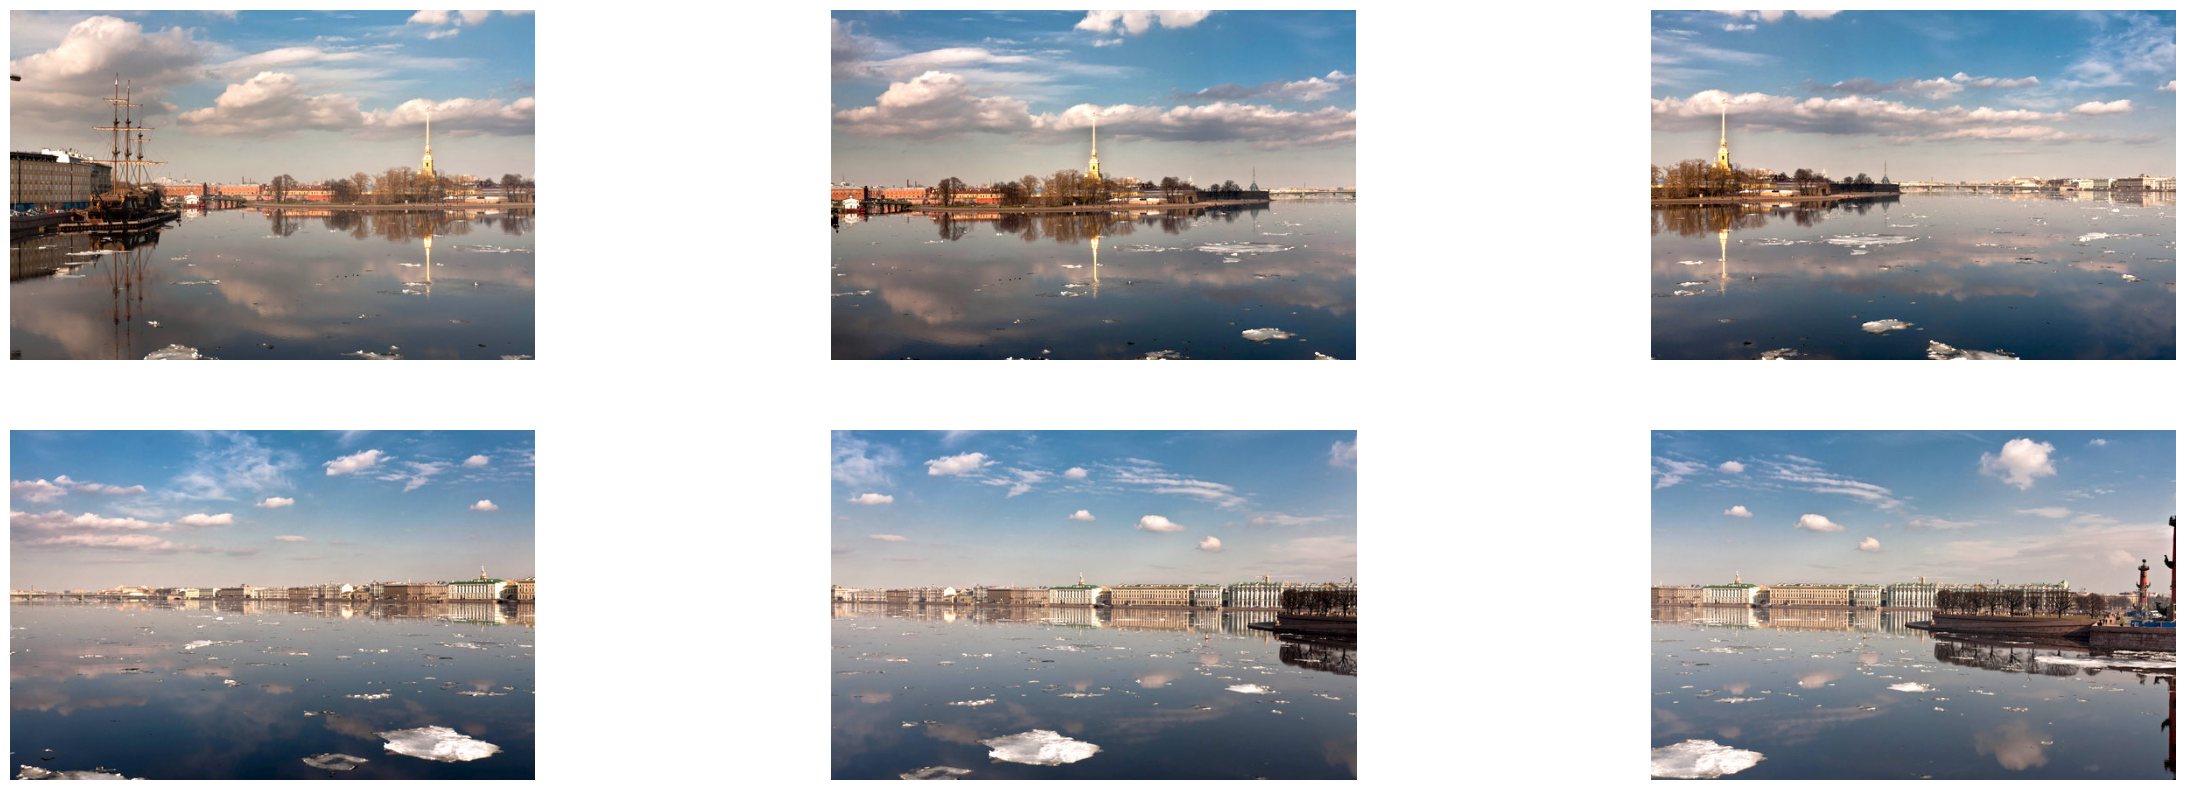

In [5]:
# Display Images
plt.figure(figsize=[30, 10])
num_cols = 3
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.axis("off")
    plt.imshow(images[i])

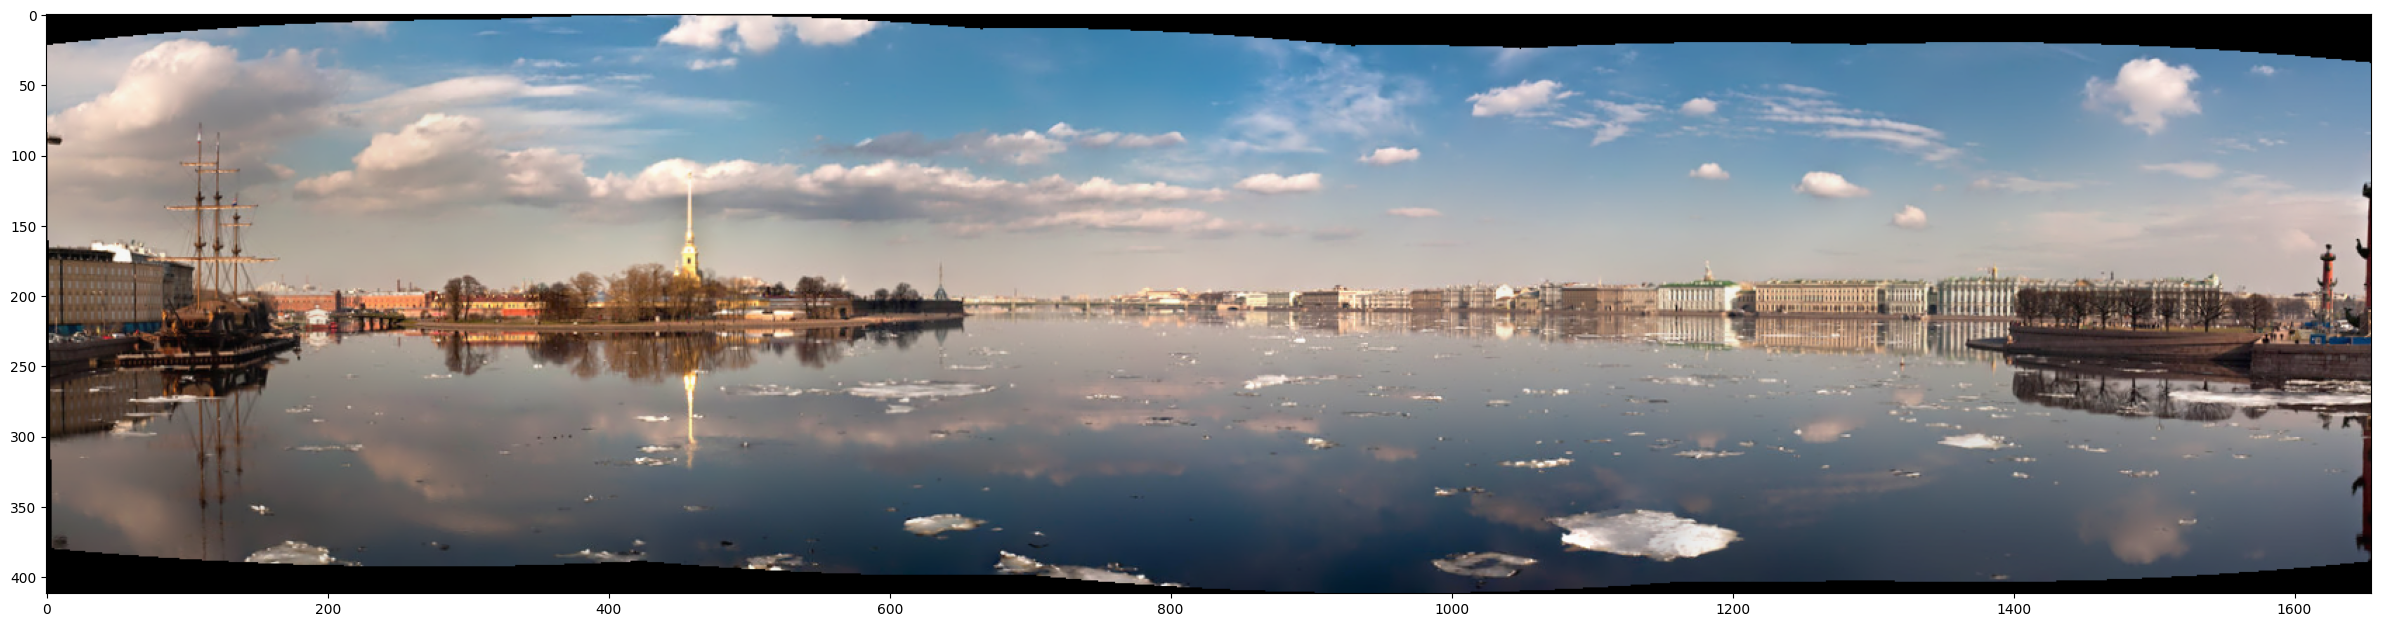

In [6]:
# Stitch Images
stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch(images)

if status == 0:
    plt.figure(figsize=[30, 10])
    plt.imshow(result)